In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
inputs = df.drop('Survived',axis='columns')
target = df['Survived']

In [4]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()

In [5]:
inputs['sex_n'] = le_sex.fit_transform(inputs['Sex'])

In [6]:
inputs

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_n
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [7]:
inputs_n = inputs.drop(['PassengerId','Name','Age','Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'],axis='columns')
inputs_n

,Pclass,Fare,sex_n
0,3,7.2500,1
1,1,71.2833,0
2,3,7.9250,0
3,1,53.1000,0
4,3,8.0500,1
...,...,...,...
886,2,13.0000,1
887,1,30.0000,0
888,3,23.4500,0
889,1,30.0000,1


In [8]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [9]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_features=3)

In [10]:
model.fit(inputs_n, target)
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 3,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [11]:
model.score(inputs_n,target)

0.9046015712682379

In [12]:
model.fit(inputs_n.values, target.values)
data_pred = model.predict(inputs_n.values)

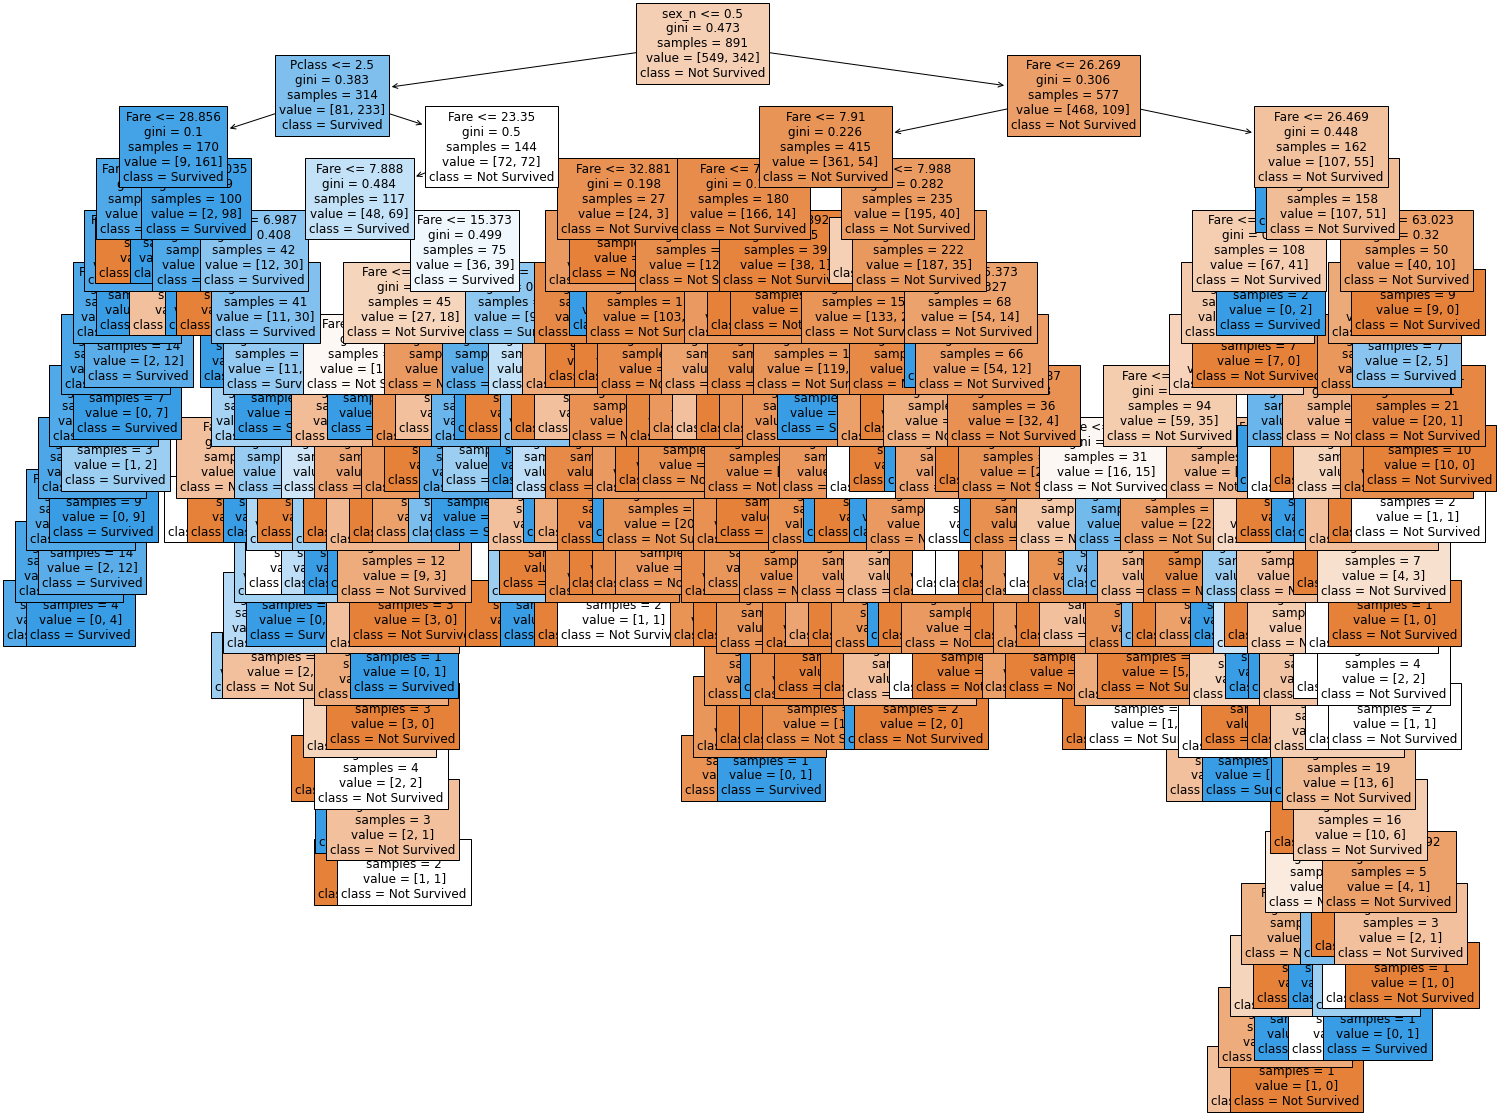

In [13]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,  
                   feature_names = inputs_n.columns,
                   class_names = {0: 'Not Survived', 1:'Survived'},
                  filled = True,
                  fontsize=12)

In [14]:
from sklearn.metrics import (roc_curve, auc, roc_auc_score,
                             confusion_matrix)

In [15]:
def get_auc_scores(clf, X_train, X_test, y_train, y_test):

    y_train_score = clf.predict_proba(X_train)[:, 1]
    y_test_score = clf.predict_proba(X_test)[:, 1] 
    auc_train = roc_auc_score(y_train, y_train_score)
    auc_test = roc_auc_score(y_test, y_test_score) 
    print(f"""
        Training AUC: {auc_train}
        Testing AUC: {auc_test}""")
 
    return y_test_score

In [16]:
score_auc = get_auc_scores(model, inputs_n, inputs_n, target, target)
score_auc


        Training AUC: 0.9677563672386795
        Testing AUC: 0.9677563672386795


/home/janani/anaconda3/envs/ucsfjupyter-env/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/home/janani/anaconda3/envs/ucsfjupyter-env/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([0.        , 1.        , 0.6       , 1.        , 0.12195122,
       0.        , 0.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 0.12195122, 0.        , 0.5       ,
       1.        , 0.        , 0.14285714, 0.        , 1.        ,
       0.2       , 0.14285714, 1.        , 0.75      , 0.        ,
       1.        , 0.1       , 0.        , 1.        , 0.02702703,
       0.        , 1.        , 0.66666667, 0.125     , 0.        ,
       0.2       , 0.15384615, 0.12195122, 0.        , 1.        ,
       0.        , 0.66666667, 0.02702703, 1.        , 1.        ,
       0.12195122, 0.        , 0.66666667, 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.85714286, 0.        ,
       0.75      , 0.875     , 0.15384615, 1.        , 0.        ,
       0.15384615, 1.        , 0.        , 0.        , 0.        ,
       1.        , 0.875     , 0.        , 0.6       , 0.09090909,
       0.125     , 0.        , 0.        , 0.        , 0.71428

## Predict score if Pclass = 3, fare = 7.2500, sex = male (1)

array([0]) means did not survive. array([1]) means did survive

In [17]:
model.predict([[2,7.2500,1]])

array([0])

## Predict score if Pclass = 1, fare = 71, sex = female (0)

In [18]:
model.predict([[1,71.2833,0]])

array([1])